In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
folder = "database_cleaned"
avis_clean = pd.read_csv(f"database_cleaned/avis_clean.csv", header=None, names=["Game id", "User id", "Game name UI", "Username", "Datetime", "Rating", "Comment title", "Comment body"])
jeux_clean = pd.read_csv(f"database_cleaned/jeux_clean.csv", index_col=0)

In [3]:
def filter_df(df_reviews, min_reviews, max_iter = 10, last_value=-1):
    """
    TODO : add parameters (memorise previous values) to stop the function when the number of users & games has converged
    """

    if (max_iter == 0):
        return len(df_reviews)
    
    # Print remaining number of users and remaining number of games
    print(df_reviews["User id"].nunique(), df_reviews["Game id"].nunique())

    # Goal : eliminate users who gave less than < min_reviews
    # Dataframe produced : index, User id, Number of rated games per user [this column is named as Game id]
    count_users = df_reviews[["Game id", "User id"]].groupby("User id").count().reset_index()

    # Reduce DataFrame 'df_reviews' which will contain only users who gave at least 'min reviews' 
    reduced = df_reviews[df_reviews["User id"].isin(count_users[count_users["Game id"] > min_reviews]["User id"])] # delete users

    # Goal : eliminate games who gave less than < min_reviews (users are already deleted)
    # Dataframe produced : index, Game id, Number of users who rated the game [this columns is named as User id]
    count_games = reduced.groupby("Game id").count().reset_index()
    
    # Reduce DataFrame 'reduced' which will contain only users who gave at least 'min reviews' AND 
    # games who received at least 'min reviews' from these users
    reduced = reduced[reduced["Game id"].isin(count_games[count_games["User id"] > min_reviews]["Game id"])] # delete games

    # Check convergence
    if(len(reduced) == len(df_reviews) or len(reduced) == 0): return len(reduced)

    # If not : reiterate (recursion) till convergence 
    else : return filter_df(reduced, min_reviews, max_iter - 1, len(df_reviews))
    

In [4]:
df = filter_df(avis_clean, 10)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


11201 10549
3242 3957
3006 3910
3003 3910
11201 10549
3242 3957
3006 3910
3003 3910
11201 10549
2908 3516
2671 3481
2665 3480
11201 10549
2639 3210
2387 3157
2379 3156
11201 10549
2437 2911
2150 2853
2139 2846
11201 10549
2252 2676
1957 2618
1947 2616
1946 2615
1945 2614
11201 10549
2086 2464
1800 2399
1792 2397
1791 2396
11201 10549
1965 2282
1649 2196
1638 2191
1637 2191
11201 10549
1850 2107
1530 2021
1509 2011
1507 2011
11201 10549
1744 1958
1410 1869
1391 1865
1390 1865
11201 10549
1640 1824
1316 1752
1304 1743
1302 1743
11201 10549
1558 1722
1234 1627
1213 1619
1210 1617
11201 10549
1499 1629
1168 1526
1143 1514
1139 1512
11201 10549
1426 1527
1097 1413
1070 1405
1068 1405
11201 10549
1370 1427
1026 1304
993 1284
988 1284
11201 10549
1300 1341
963 1221
925 1200
918 1198
917 1196
916 1192
913 1190
11201 10549
1259 1267
904 1158
873 1140
869 1136
868 1135
11201 10549
1215 1205
865 1095
836 1073
828 1066
826 1065
11201 10549
1176 1148
819 1025
780 1005
775 1004
11201 10549
1132 1099

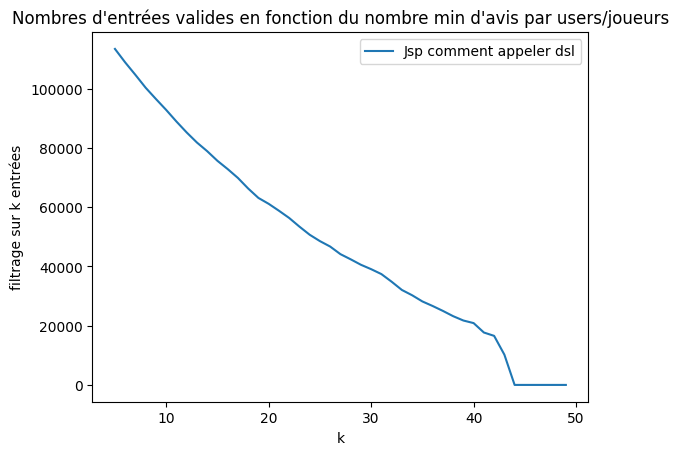

In [5]:
# Affichage : 
x_data = np.arange(start=5,stop=50,step=1)
vect = np.vectorize(lambda x : filter_df(avis_clean,x))
y_data = vect(x_data)

print("Affichage")
plt.plot(x_data,y_data, label ="Jsp comment appeler dsl")
plt.xlabel("k")
plt.ylabel("filtrage sur k entrées")
plt.legend()
plt.title("Nombres d'entrées valides en fonction du nombre min d'avis par users/joueurs")
plt.show()


In [6]:
df[["User id", "Game id"]].groupby("User id").count().reset_index().sort_values(by="Game id")

TypeError: 'int' object is not subscriptable